# Week 3 handin

## 01 Assignment
Here is the text for the assignment linked to

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

## 03 Solution part 1

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [8]:
import pandas as pd

In [9]:
# 8. Change in pct of divorced danes from 2008 to 2020
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=*"
divorced = pd.read_csv(url, sep=";", encoding="utf-8")

def get_percent():
    first = divorced.iloc[0, 2]
    last = divorced.iloc[-1, 2]
    return (last - first) / first * 100
    
print(f"change in percent: {round(get_percent(), 2)}%")

change in percent: 30.12%


In [10]:
# 9. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K1%2C2020K2%2C2020K3%2C2020K4&OMR%C3%85DE=*&CIVILSTAND=U%2CG%2CE%2CF"
data = pd.read_csv(url, sep=";", encoding="utf-8")
no_all_cities = data[data["OMRÅDE"] != "Hele landet"]

def get_five_biggest():
    biggest_cities = no_all_cities.sort_values("INDHOLD", ascending=False)
    return biggest_cities[:20]
    
five_biggest = get_five_biggest()
print(five_biggest[five_biggest.CIVILSTAND == "Ugift"].iloc[0])

TID                       2020K4
OMRÅDE        Region Hovedstaden
CIVILSTAND                 Ugift
INDHOLD                   981652
Name: 1264, dtype: object


{'2009': 516300, '2010': 395239, '2011': 401855, '2012': 407680, '2013': 410976, '2014': 415123, '2015': 416244, '2016': 420499, '2017': 425139, '2018': 432030, '2019': 439760, '2020': 447174, '2021': 449780}


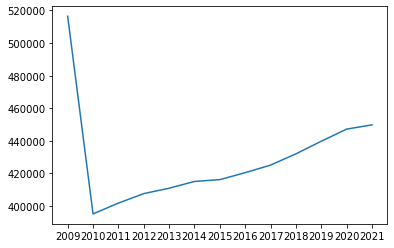

In [11]:
import matplotlib.pyplot as plt

# 3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=G&Tid=*"
data = pd.read_csv(url, sep=";", encoding="utf-8")

def get_calculated_years():
    currentYear = ""
    currentTime = 0
    time = dict()
    for idx, year in enumerate(data["TID"]):
        year = year[:4]
        if currentYear == "":
            currentYear = year
        if currentYear == year:
            currentTime = currentTime + data.iloc[idx]["INDHOLD"]
        else:
            time.setdefault(year, currentTime)
            currentYear = year
            currentTime = 0
    return time
    
years = get_calculated_years()
print(years)

plt.plot(list(years.keys()), list(years.values()))

No handles with labels found to put in legend.


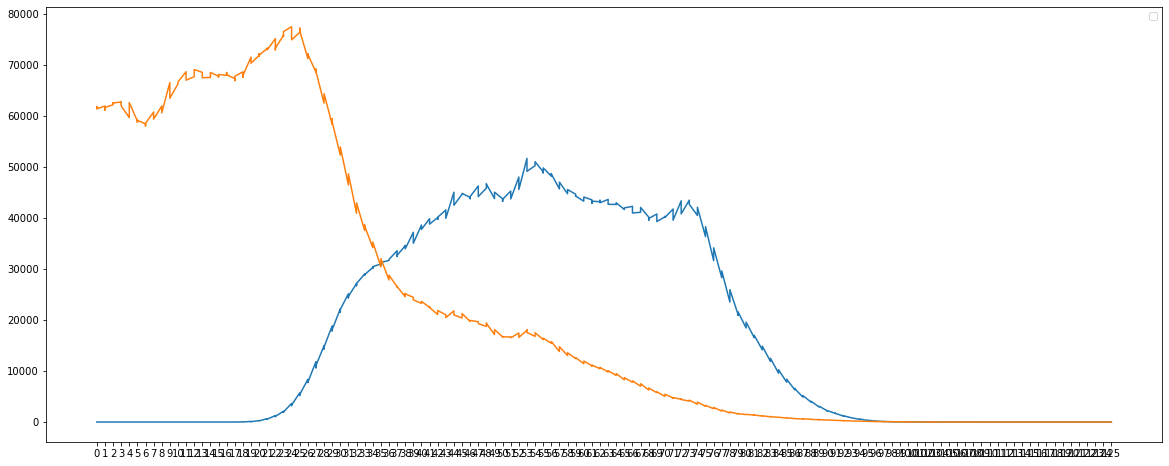

In [18]:
# 4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 
# (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU&ALDER=*&Tid=2020K1%2C2020K2%2C2020K3%2C2020K4"
data = pd.read_csv(url, sep=";", encoding="utf-8")
data = data[data["ALDER"] != "I alt"]

plt.figure(figsize= (20, 8))

def get_plot(civil_stand: str):
    values = data[data["CIVILSTAND"] == civil_stand]
    x_values = [x.split(" ")[0] for x in values["ALDER"]]
    plt.plot(x_values, values["INDHOLD"])

get_plot("Gift/separeret")
get_plot("Ugift")


plt.legend()

## 04 Solution part 2